In [ ]:
import csv
import datetime

NAME = 'Bored Ape Yacht Club'

floors, sales = [], []

with open('floors.csv', 'r') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    floors.append([
      datetime.datetime.fromisoformat(row[0]).timestamp(),
      float(row[1]),
    ])

with open('sales.csv', 'r') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    sales.append([
      datetime.datetime.fromisoformat(row[0]).timestamp(),
      int(row[1]),
      float(row[2])
    ])

with open('rarities.txt', 'r') as f:
  rarities = [int(i) for i in f.read().split('\n')]

floors = sorted(floors, key=lambda x: x[0])
sales = sorted(sales, key=lambda x: x[0])
rarities = {token_id: i + 1 for i, token_id in enumerate(rarities)}

In [ ]:
def binary_search(lst, target):
  start = 0
  end = len(lst) - 1

  while start <= end:
    middle = (start + end) >> 1
    if lst[middle][0] > target:
      end = middle - 1
    else:
      start = middle + 1

  return middle

In [ ]:
nfts = {}

for sale in sales:
  closest_floor = floors[binary_search(floors, sale[0])][1]
  nfts.update({
    sale[1]: min((nfts.get(sale[1], 10_000), round(sale[2] / closest_floor, 4)))
  })

In [ ]:
def get_floor_nft_counts(data, threshold):
  sold_within_threshold = len(
    [nft for nft in data.values() if nft <= (1 + threshold)]
  )
  total_count = len(data.values())

  print(
    (
      f"Sold within {100 * threshold}% of floor: {sold_within_threshold} "
      f"({round(100 * sold_within_threshold / total_count, 2)}%)"
    )
  )

for threshold in [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]:
  get_floor_nft_counts(nfts, threshold)

print('\nNote: the displayed % are amongst NFTs that\nhave had a sale before')

Sold within 1.0% of floor: 3310 (38.65%)
Sold within 5.0% of floor: 3832 (44.75%)
Sold within 10.0% of floor: 4389 (51.26%)
Sold within 20.0% of floor: 5097 (59.52%)
Sold within 25.0% of floor: 5369 (62.7%)
Sold within 50.0% of floor: 6374 (74.44%)
Sold within 75.0% of floor: 6907 (80.66%)
Sold within 100% of floor: 7333 (85.64%)
Sold within 250.0% of floor: 8063 (94.16%)
Sold within 500% of floor: 8335 (97.34%)
Sold within 750.0% of floor: 8420 (98.33%)
Sold within 1000% of floor: 8453 (98.72%)
{3231: 8106.0606, 2488: 89.2857, 3953: 83.5752, 8746: 78.0729, 8023: 66.6533, 7948: 66.25, 1913: 52.0833, 5449: 50.0, 5491: 45.4545, 3917: 41.6667, 5708: 37.5, 5447: 34.375, 4572: 32.3741, 197: 30.791, 1726: 26.6667, 9186: 26.6667, 4458: 26.3393, 8483: 25.7143, 2489: 25.1572, 4980: 25.0, 4882: 24.8456, 9279: 24.4444, 1676: 24.3902, 949: 23.7931, 7398: 23.4615, 6948: 23.3333, 7282: 23.0, 3287: 22.5595, 6266: 22.0, 528: 21.6811, 3439: 21.4439, 4614: 21.4439, 6841: 21.0526, 2980: 20.8333, 7527: 20

In [ ]:
import json

with open('ratios.json', 'w') as f:
  json.dump(nfts, f, indent=4)

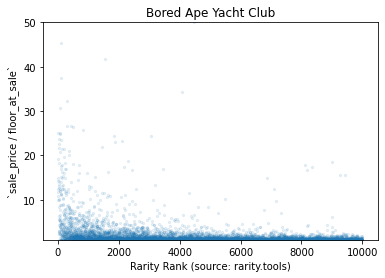

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1)

y_upper = 50

ratios = nfts.values()

rarity = [rarities[token_id] for token_id in nfts.keys()]

plt.scatter(
  rarity,
  ratios,
  s=5,
  alpha=0.1,
)

plt.ylim(1, y_upper)

plt.title('Bored Ape Yacht Club')
plt.ylabel('`sale_price / floor_at_sale`')
plt.xlabel('Rarity Rank (source: rarity.tools)')

ax.figure.set_facecolor('white')

plt.show()